# K-Means Clustering - Class Exercise 1

## Introduction

This diabetes dataset comprises several medical variables including the number of pregnancies, plasma glucose concentration, diastolic blood pressure, triceps skin fold thickness, 2-hour serum insulin, body mass index (BMI), diabetes pedigree function, and age. These attributes provide insights into an individual's health status and are used to predict the outcome variable, which denotes whether a person has been diagnosed with diabetes (1) or not (0).

By utilizing this dataset, we aim to segment individuals into clusters based on similar health-related characteristics, which can unveil patterns and relationships within the data, potentially leading to more personalized healthcare insights and contributing to the prevention or better management of diabetes.

Perform K-means clustering on the diabetes dataset and determine the optimal number of clusters to use.

## Metadata

| Variables            | Description                                               |
|----------------------|-----------------------------------------------------------|
| Pregnancies          | Number of times pregnant                                  |
| Glucose              | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| Blood Pressure       | Diastolic blood pressure (mmHg)                           |
| Skin thickness       | Triceps skin fold thickness (mm)                          |
| Insulin              | 2-Hour serum insulin (mu U/ml)                            |
| BMI                  | Body mass index (weight in kg/(height in m)^2)            |
| Diabetes Pedigree Function | Diabetes pedigree function                          |
| Age                  | Age of person                                             |
| Outcome              | Class variable (0 = non-diabetic, 1 = diabetic)           |



## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df = pd.read_csv(_)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Drop target vatiable

Since clustering is an unsupervised learning technique, we do not need the target variable ```Outcome``` in our analysis and will therefore drop this variable from the dataset.

In [3]:
df = df.drop(_, axis=1)
df.shape

(768, 8)

## Check for missing values

In [4]:
missing_values = df._
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

We observe that there are no missing values in the dataset.

## Normalize data

Clustering uses distance metrics to measure similarity between objects, and these distance metrics are sensitive to the scale of data. Hence, we will normalize the data to ensure that variables with larger numerical values do not dominate the distance calculations.

In [5]:
# Create instance of min-max normalizer
normalizer = MinMaxScaler()

# Fit normalizer to the data
normalizer.fit(df)

# Normalize the data
data_norm = normalizer.transform(df)

## Fit K-Means model

In [6]:
# Specify model parameters
K = 2
random_seed = 9002

# Build model
model = KMeans(n_clusters=K, random_state=random_seed)

# Fit model on dataset
model.fit(data_norm)

# Convert dataset to dataframe
df_norm = pd.DataFrame(data_norm, columns=df.columns)

# Append final cluster labels to original dataset
cluster_labels = model.labels_
df_norm['Cluster'] = cluster_labels

# Display appended dataset
df_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


## Display Cluster Sizes and Cluster Centroids

In [7]:
# Display cluster sizes
cluster_counts = df_norm._
cluster_counts

Cluster
0    253
1    515
dtype: int64

In [8]:
# Display cluster centroids
cluster_centroids = df_norm._
cluster_centroids

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,,,,,
0,0.437108,0.664449,0.618415,0.181060,0.081766,0.483386,0.169130,0.423452
1,0.122559,0.579538,0.540904,0.220398,0.100496,0.473549,0.167712,0.096214


## Visualize Clustering Results

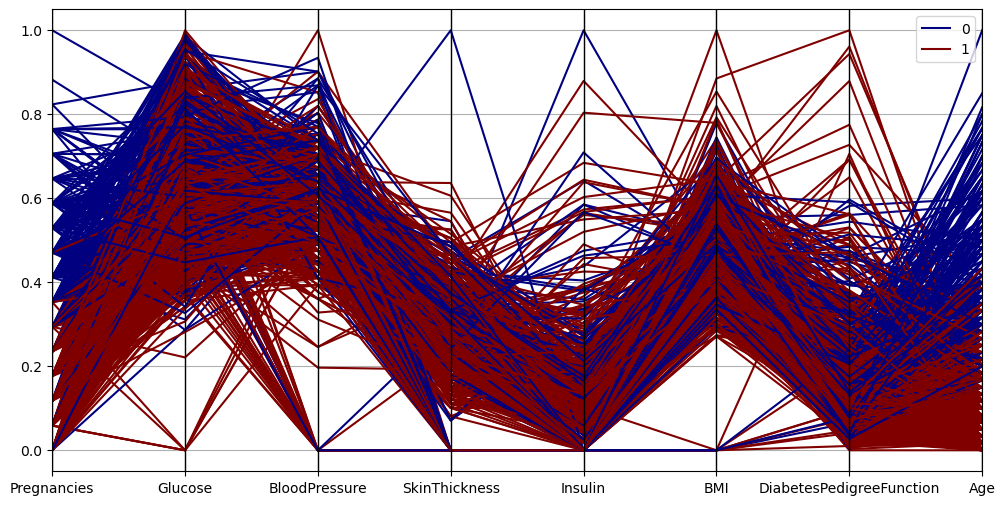

In [9]:
# Parallel coordinates plot

plt.figure(figsize=(12,6))
parallel_coordinates(df_norm, class_column='Cluster', color=plt.cm.jet(np.linspace(0, 1, model.n_clusters)))
plt.show()

From the parallel coordinates plot, we observe that ```Pregnancies``` and ```Age``` offer a good separation between the two clusters. Hence, we will use these two variables to visualize the clustering results on a scatter plot next.

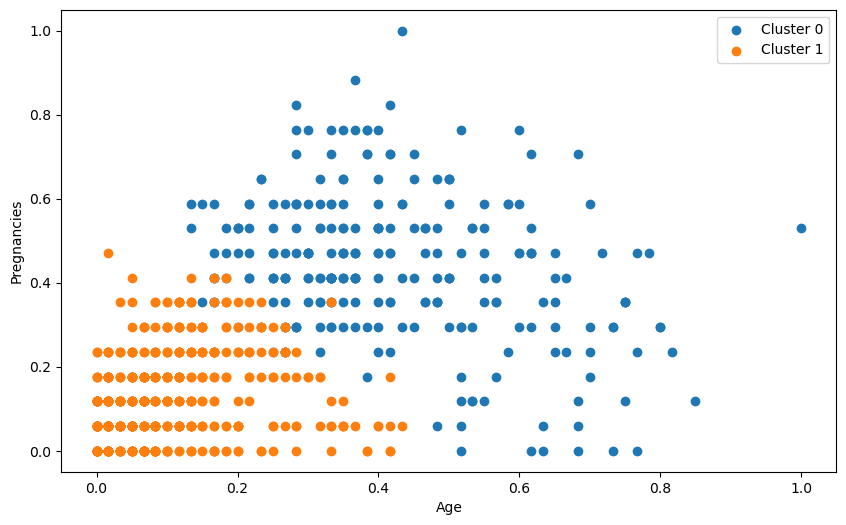

In [10]:
# Scatter plot
plt.figure(figsize=(10, 6))
clusters = df_norm['Cluster'].unique()
for cluster in clusters:
    cluster_data = df_norm[df_norm['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Pregnancies'], label=f'Cluster {cluster}')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.legend()
plt.show()

## Elbow Method

We will now implement the elbow method to find the optimal number of clusters ```K```.

In [11]:
# Write a custom function to implement the elbow method

def elbow(data, max_clusters):
    """
    Performs the elbow method on the given dataset to find the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS).
    
    Parameters:
    - data: The dataset to cluster, as a NumPy array or pandas DataFrame.
    - max_clusters: The maximum number of clusters to try.
    """
    
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=9002)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', markersize=8)
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, max_clusters + 1))
    plt.show()

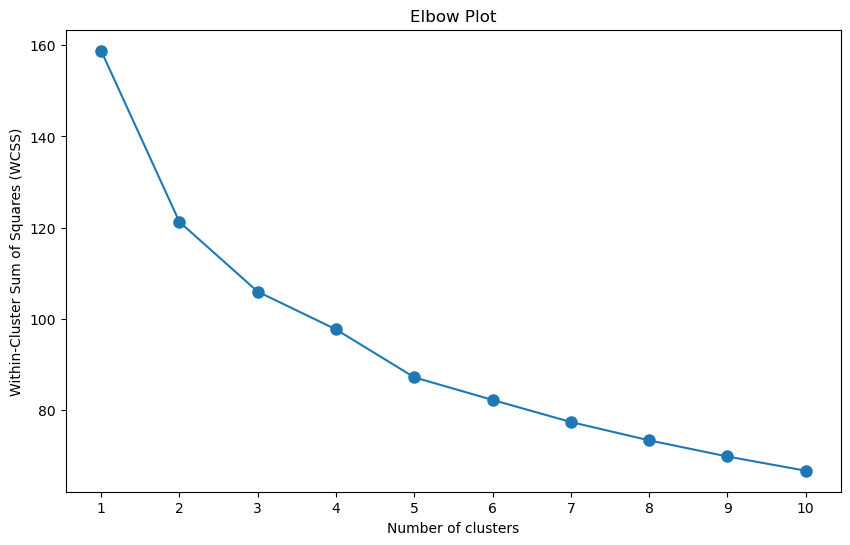

In [12]:
# Generate the elbow plot
elbow(data_norm, max_clusters=10)